In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Importing dataset

In [ ]:
train3 = []
with open('/content/train3.txt') as f:
  for line in f.readlines():
    train3.append(line.split())

train3 = np.array(train3,dtype=float)
print(train3.shape)



(700, 64)


In [ ]:
train5 = []
with open('/content/train5.txt') as f:
  for line in f.readlines():
    train5.append(line.split())

train5 = np.array(train5,dtype=float)
print(train5.shape)


(700, 64)


## Creating Labels to shuffle the data
### 0: image 3


In [ ]:
y3 = np.array(([0]*train3.shape[0])).reshape(-1,1)
full3 = np.hstack((train3,y3))
print(full3[0])

[0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


### 1: image 5

In [ ]:
y5 = np.array(([1]*train5.shape[0])).reshape(-1,1)
full5 = np.hstack((train5,y5))
print(full5[0])

[0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]


In [ ]:
dataset = np.vstack((full3,full5))
np.random.shuffle(dataset)
train35x = dataset[:,:-1]
train35y = dataset[:,-1].reshape(-1,1)

## Gradient Ascent

### Init

In [ ]:
def initWeights():
  w = 100 * np.random.random_sample((train3.shape[1],1)) - 50
  w/=100
  return(w)

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))
def calcProb(wts):
  return sigmoid(np.dot(train35x,wts))

In [ ]:
def lrate():
  neuLR = np.random.random_sample()/1400
  return neuLR

### Algo used Gradient Ascent:


In [ ]:
N = 50000
finalW = []
minErr = float("inf")
neuLR = 0.2/train35x.shape[0]
wts = initWeights()
lwlis = []
errl = []
print("USING Learning rate as: ",neuLR)
for i in range(N):
    prob = calcProb(wts)
    t1 = np.log(prob)*train35y
    t2 = np.log(1-prob) * (1-train35y)
    lw = t1+t2
    # print(lw)
    # break
    # lwlis.append(np.sum(lw.reshape(1,-1)[0]))

    llh = np.sum(lw,axis = 0)
    
    lwlis.append(llh)
    yPred = np.where(prob > 0.5,1,0)
    err = np.sum(np.absolute(train35y - yPred),axis = 0) / train35x.shape[0]
    errl.append(err[0])
    
    if err[0] < minErr:
        minErr = err[0]
        finalW = wts

    # Next vars
    gradient = np.sum(((train35y - prob) * train35x) ,axis = 0).reshape(-1,1)
    wts = wts + (neuLR * gradient)


USING Learning rate as:  0.00014285714285714287


In [ ]:
minErr

0.037142857142857144

### Plot shows convergence!

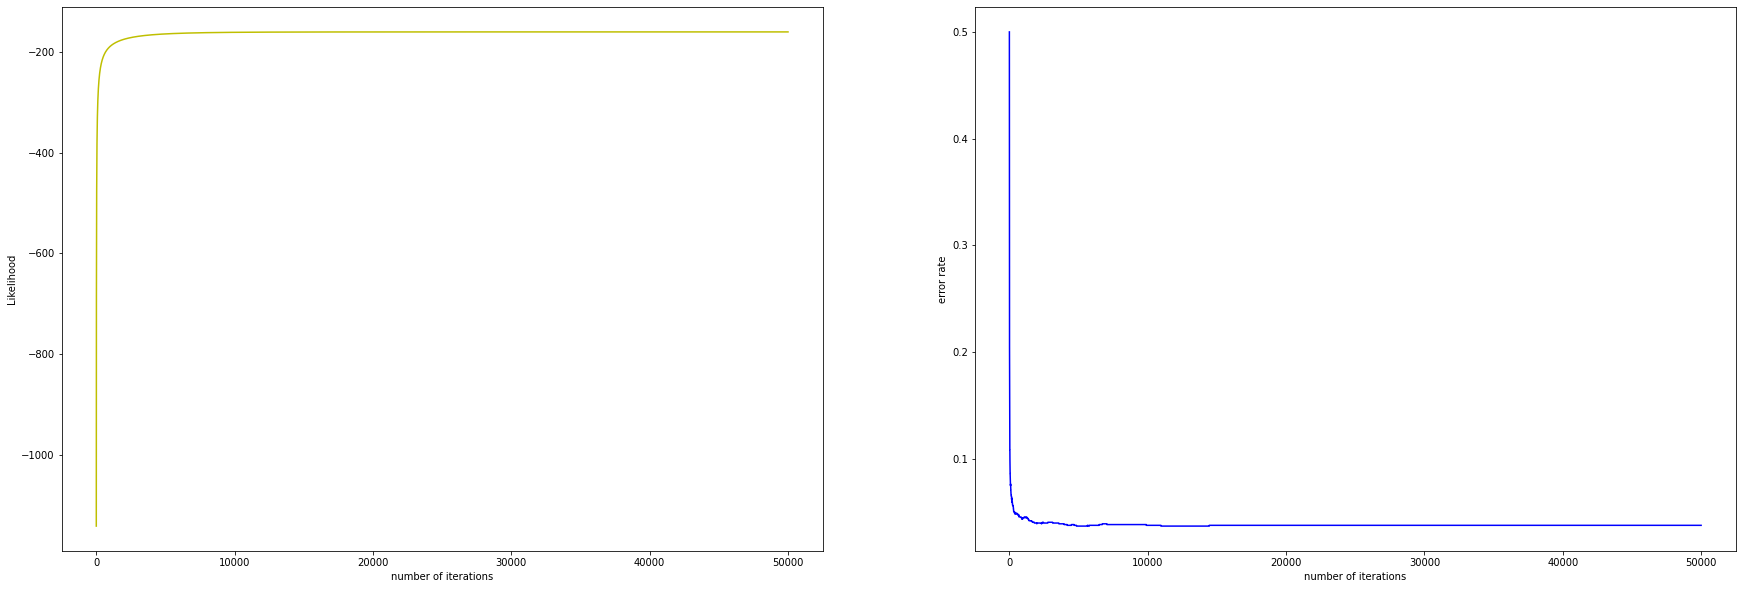

In [ ]:
x = np.linspace(0,N,N)
fig=plt.figure(figsize=(30,10))
fig.add_subplot(1,2,1)
plt.plot(x,lwlis,'y')
plt.xlabel('number of iterations')
plt.ylabel('Likelihood')
fig.add_subplot(1,2,2)
plt.plot(x,errl,'b')
plt.xlabel('number of iterations')
plt.ylabel('error rate')
plt.show()

### 8x8 Weights matrix, in table and matrix form:

In [ ]:
tmp = finalW.reshape(8,8)
cnt = 0
for i in range(len(tmp)):
  for j in range(len(tmp[0])):
    print("W",cnt,": ",round(tmp[i][j],4),end="\t")
    cnt+=1
  print()



W 0 :  -0.7931	W 1 :  -1.4542	W 2 :  -1.1795	W 3 :  -1.0558	W 4 :  -0.7595	W 5 :  -0.7479	W 6 :  0.7966	W 7 :  1.7145	
W 8 :  0.0449	W 9 :  -0.0231	W 10 :  0.1844	W 11 :  -0.0837	W 12 :  -0.3198	W 13 :  0.6953	W 14 :  -1.2356	W 15 :  -1.2506	
W 16 :  3.1376	W 17 :  1.377	W 18 :  1.3376	W 19 :  0.2213	W 20 :  0.5923	W 21 :  -1.8775	W 22 :  -2.39	W 23 :  -2.3893	
W 24 :  0.8289	W 25 :  0.3875	W 26 :  0.5412	W 27 :  -0.2347	W 28 :  -0.54	W 29 :  -2.1068	W 30 :  0.3277	W 31 :  -0.0442	
W 32 :  0.4428	W 33 :  1.0352	W 34 :  0.0408	W 35 :  -0.3249	W 36 :  -0.6073	W 37 :  -0.2293	W 38 :  -0.3799	W 39 :  -0.306	
W 40 :  1.1113	W 41 :  -0.1957	W 42 :  -0.2851	W 43 :  -0.0488	W 44 :  0.0733	W 45 :  -0.7715	W 46 :  0.7316	W 47 :  -1.4308	
W 48 :  1.3597	W 49 :  -0.5857	W 50 :  1.24	W 51 :  0.5435	W 52 :  0.3816	W 53 :  -0.2663	W 54 :  0.2263	W 55 :  -1.0626	
W 56 :  0.5138	W 57 :  0.264	W 58 :  0.8857	W 59 :  1.6772	W 60 :  0.423	W 61 :  0.6365	W 62 :  0.4944	W 63 :  -0.4671	


In [ ]:
print("FINAL WEIGHTS")
x = PrettyTable()
x.add_column("Weights", range(64))
x.add_column("Value", finalW[:,0])
print(x)

FINAL WEIGHTS
+---------+-----------------------+
| Weights |         Value         |
+---------+-----------------------+
|    0    |  -0.7930971502761953  |
|    1    |  -1.4542176626113985  |
|    2    |   -1.179461941762627  |
|    3    |  -1.0558085734940366  |
|    4    |  -0.7595034789625994  |
|    5    |  -0.7478580076891667  |
|    6    |   0.7966308450532321  |
|    7    |   1.7144935529053704  |
|    8    |  0.044856012414151804 |
|    9    | -0.023068917705294307 |
|    10   |   0.184432639776959   |
|    11   |  -0.08369501379328186 |
|    12   |  -0.31980200605467984 |
|    13   |   0.695308001099729   |
|    14   |  -1.2355579937600598  |
|    15   |  -1.2506010166308943  |
|    16   |    3.13762132638525   |
|    17   |   1.377002624226973   |
|    18   |   1.3375811520760787  |
|    19   |  0.22127818372553024  |
|    20   |   0.5923476145605169  |
|    21   |  -1.8775155200873153  |
|    22   |   -2.389994724425963  |
|    23   |    -2.3893362927912   |
|    24   |   

## Testing

In [ ]:
test3 = []
with open('/content/test3.txt') as f:
  for line in f.readlines():
    test3.append(line.split())

test3 = np.array(test3,dtype=float)
print(test3.shape)

(400, 64)


In [ ]:
test5 = []
with open('/content/test5.txt') as f:
  for line in f.readlines():
    test5.append(line.split())

test5 = np.array(test5,dtype=float)
print(test5.shape)

(400, 64)


In [ ]:
y_3 = np.array(([0]*test3.shape[0])).reshape(-1,1)
full3 = np.hstack((test3,y_3))
# print(full3[0])

y_5 = np.array(([1]*test5.shape[0])).reshape(-1,1)
full5 = np.hstack((test5,y_5))
# print(full5[0])

testset = np.vstack((full3,full5))
np.random.shuffle(testset)
test35x = testset[:,:-1]
test35y = testset[:,-1].reshape(-1,1)

## Error rate for test3 and test5 combined

In [ ]:
def calcTest(wts):
  return sigmoid(np.dot(test35x,wts))

In [ ]:
prob = calcTest(finalW)
pred = np.where(prob > 0.5,1,0)
err = np.sum(np.absolute(test35y - pred),axis = 0) / test35x.shape[0]
print("Test Error:",str(err))

Test Error: [0.06]


## Error rate for test3 

In [ ]:
def calcTest(wts):
  return sigmoid(np.dot(test3,wts))

In [ ]:
prob = calcTest(finalW)
pred = np.where(prob > 0.5,1,0)
err = np.sum(np.absolute(y_3 - pred),axis = 0) / test3.shape[0]
print("Test Error:",str(err))

Test Error: [0.0675]


## Error rate for test5 

In [ ]:
def calcTest(wts):
  return sigmoid(np.dot(test5,wts))

In [ ]:
prob = calcTest(finalW)
pred = np.where(prob > 0.5,1,0)
err = np.sum(np.absolute(y_5 - pred),axis = 0) / test5.shape[0]
print("Test Error:",str(err))

Test Error: [0.0525]
